<a href="https://colab.research.google.com/github/NguyenGiaKhanh141/Clustering-of-movement-behavior-based-on-phone-data/blob/main/Clustering_of_movement_behavior_based_on_phone_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 10> k-Means </font></h1>

In this notebook, we try to practice one of the most popular algorithms in Clustering that we learned in this course: k-Means algorithm. 

We load a dataset using Pandas library and apply k-Means to explore information from data.
Lets first load required libraries:

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

def showandtell(title=None):
  plt.show()

A convenience function for you to use:

In [ ]:
def clusterInfo(model):
    print("Cluster Analysis Inertia: ", model.inertia_)
    print('------------------------------------------')
    
    for i in range(len(model.cluster_centers_)):
        print("\n  Cluster ", i)
        print("    Centroid ", model.cluster_centers_[i])
        print("    #Samples ", (model.labels_==i).sum()) # NumPy Power

In [ ]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensure there's at least on cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()

    print("\n  Cluster With Fewest Samples: ", minCluster)
    return (model.labels_==minCluster)

# Mandatory part (85%  of the total score)

### About dataset

A [call detail record](https://en.wikipedia.org/wiki/Call_detail_record) (CDR) is a data record produced by a telephone exchange or other telecommunications equipment that documents the details of a telephone call or other telecommunications transaction (e.g., text message) that passes through that facility or device.

The questions you'll be exploring in this lab assignment using K-Means are: exactly how useful is telephone metadata? It must have some use, otherwise, the government wouldn't have invested however many millions they did into it secretly collecting it from phone carriers. Also what kind of intelligence can you extract from CDR metadata besides its face value?

The record contains various attributes of the call, such as time, duration, completion status, source number, and destination number. It is the automated equivalent of the paper toll tickets that were written and timed by operators for long-distance calls in a manual telephone exchange.

The dataset we've curated for you contains call records of 10 people, tracked over the course of 3 years. Your job in this assignment is to find out where each of these people likely live and where they work at!


**1. Start by loading up the dataset and taking a peek at its head. You have to convert date-strings to real date-time objects using `pd.to_datetime`, and the times using `pd.to_timedelta`:**

In [ ]:
data = pd.read_csv('D:/Data Science Funix/ASM/DSP303x_ASM3/CDR.csv')
data

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
...,...,...,...,...,...,...,...,...,...,...
53183,8549533077,491169353,Missed,2013-02-26,19:11:18.125445,Tue,0:04:05.656331,6c1f0271-70e2-4ea6-bb8b-23b3b0b06117,32.772361,-96.777278
53184,8549533077,2362231379,Incoming,2013-02-26,18:01:56.075434,Tue,0:01:53.848597,a11a02cf-73c6-479c-8cf1-8fbee7917716,32.786556,-96.791250
53185,8549533077,186272563,Incoming,2013-02-26,16:08:57.602134,Tue,0:01:57.577549,06fe2702-1f88-4dfd-90d6-22c2d3227855,32.985083,-96.802556
53186,8549533077,2288700880,Incoming,2013-02-26,08:01:39.721347,Tue,0:01:39.690498,269b1e26-49c4-4308-8879-8f2d37528c8a,32.985083,-96.802528


In [ ]:
data["CallDate"]=pd.to_datetime(data["CallDate"])

In [ ]:
data["CallTime"]=pd.to_timedelta(data["CallTime"]) 

In [ ]:
data.dtypes

In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration              object
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object

**2. Create a distinct list of `In` phone numbers (people) and store the values in a regular python list.**

Make sure the numbers appear in your list in the same order they appear in your dataframe; but only keep a single copy of each number. [This link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html) might also be helpful.

In [ ]:
#TO DO:
unique_phone_no=data["In"].unique()
unique_phone_no

array([4638472273, 1559410755, 4931532174, 2419930464, 1884182865,
       3688089071, 4555003213, 2068627935, 2894365987, 8549533077],
      dtype=int64)

**3. Create a slice named `user1` that filters to _only_ include dataset records where the `In` feature (user's phone number) is equal to the first number on your unique list above, i.e., the very first number in the dataset:**

In [ ]:
#TO DO:
user1=data[data['In'] ==unique_phone_no[0]]
user1

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,0 days 07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,0 days 21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,0 days 14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,0 days 16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,0 days 15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
...,...,...,...,...,...,...,...,...,...,...
53140,4638472273,2666307251,Missed,2013-02-26,0 days 11:26:01.888502,Tue,0:03:08.177065,0296279d-18c3-4709-853e-3e20496ce444,32.899944,-96.910389
53141,4638472273,2145623768,Missed,2013-02-26,0 days 17:32:18.776276,Tue,0:02:30.823459,78512965-e30b-4734-ae92-47b910fe3d7f,32.899944,-96.910389
53142,4638472273,4551601645,Incoming,2013-02-26,0 days 19:12:44.730636,Tue,0:03:42.954201,8fb02570-fb3f-4381-be74-3e1accf87ec5,32.750556,-96.694722
53143,4638472273,7721472178,Incoming,2013-02-26,0 days 07:50:41.435642,Tue,0:04:04.460385,e78826ad-45b0-45d4-90ec-4776d73f1d8e,32.864167,-96.836944


**4. Let's go ahead and plot all the call locations for user 1 in all time:**


<AxesSubplot:xlabel='TowerLon', ylabel='TowerLat'>

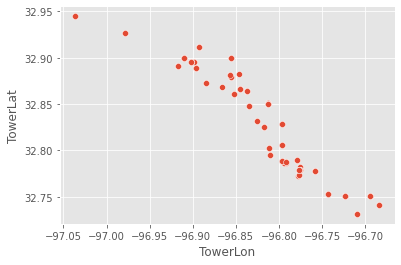

In [ ]:
#TO DO:
import seaborn as sns
sns.scatterplot(data=user1, x="TowerLon", y="TowerLat")

INFO: The locations map above should be too "busy" to really wrap your head around. This is where domain expertise comes into play. Your intuition can direct you by knowing people are likely to behave differently on weekends vs on weekdays:

#### On Weekends
1. People probably don't go into work
1. They probably sleep in late on Saturday
1. They probably run a bunch of random errands, since they couldn't during the week
1. They should be home, at least during the very late hours, e.g. 1-4 AM

#### On Weekdays
1. People probably are at work during normal working hours
1. They probably are at home in the early morning and during the late night
1. They probably spend time commuting between work and home everyday

**5. Add more filters to the `user1` slice you created. Add bitwise logic so that you only examine records that _came in_ on weekends (sat/sun):**

In [ ]:
#TO DO:
user1_weekends = user1[(user1['DOW'] == 'Sat') | (user1['DOW'] == 'Sun')].copy()
user1_weekends

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,0 days 07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,0 days 21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,0 days 14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,0 days 16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,0 days 15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
...,...,...,...,...,...,...,...,...,...,...
52964,4638472273,6022767590,Incoming,2013-02-23,0 days 16:12:12.701600,Sat,0:02:21.278138,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
52965,4638472273,5621270003,Incoming,2013-02-23,0 days 09:11:21.606945,Sat,0:03:19.757526,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
53022,4638472273,7756914135,Incoming,2013-02-24,0 days 16:49:42.830258,Sun,0:02:19.285474,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
53023,4638472273,7721472178,Incoming,2013-02-24,0 days 10:32:55.146952,Sun,0:00:04.908620,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389


**6. Further filter `user1` down for calls that came in either before 6am OR after 10pm (22:00:00).**

Even if you didn't convert your times from string objects to time deltas, you can still use `<` and `>` to compare the string times as long as you code them as [military time strings](https://en.wikipedia.org/wiki/24-hour_clock), eg: "06:00:00", "22:00:00": 

You may also want to review the Data Manipulation section for this. Once you have your filtered slice, print out its length:

In [ ]:
#TO DO:
user1_time_call_oow = user1_weekends[(user1_weekends['CallTime'] >= '22:00:00') | (user1_weekends['CallTime'] <= '06:00:00')]
user1_time_call_oow

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
940,4638472273,6150928001,Incoming,2011-01-08,0 days 22:22:33.693878,Sat,0:00:35.065912,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
1875,4638472273,2145623768,Incoming,2011-01-22,0 days 22:21:27.466908,Sat,0:03:40.018320,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
6949,4638472273,5621270003,Missed,2011-04-09,0 days 22:59:23.206408,Sat,0:03:06.567364,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
7468,4638472273,7756914135,Incoming,2011-04-17,0 days 05:15:40.205917,Sun,0:02:09.984993,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
9753,4638472273,7922223441,Incoming,2011-05-21,0 days 05:08:20.121145,Sat,0:01:30.059591,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
13951,4638472273,7428841195,Missed,2011-07-23,0 days 22:56:02.014834,Sat,0:04:48.497077,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
17515,4638472273,2666307251,Incoming,2011-09-11,0 days 05:44:15.432523,Sun,0:01:39.500414,bcec0121-164d-406c-8c04-d12870893992,32.731611,-96.709417
21638,4638472273,6150928001,Incoming,2011-11-13,0 days 05:10:41.954161,Sun,0:00:44.369613,f3f289f5-7d29-4d3f-9b9a-a0ceaca10a1d,32.750556,-96.694722
22045,4638472273,6022767590,Missed,2011-11-19,0 days 22:59:53.166951,Sat,0:00:05.795265,8ba7e0d7-eb6e-4828-9c70-c469954a627d,32.731611,-96.709417
22502,4638472273,5621270003,Incoming,2011-11-26,0 days 22:10:48.879076,Sat,0:03:07.592270,bcec0121-164d-406c-8c04-d12870893992,32.731611,-96.709417


**7. Visualize the dataframe with a scatter plot as a sanity check.**

Since you're [familiar with maps](https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude), you know well that your X-Coordinate should be Longitude, and your Y coordinate should be the tower Latitude. Check the dataset headers for proper column feature names.
 
At this point, you don't yet know exactly where the user is located just based on the cell phone tower position data; but considering the below are for Calls that arrived in the twilight hours of weekends, it's likely that wherever they are bunched up is probably near where the caller's residence:

<AxesSubplot:xlabel='TowerLon', ylabel='TowerLat'>

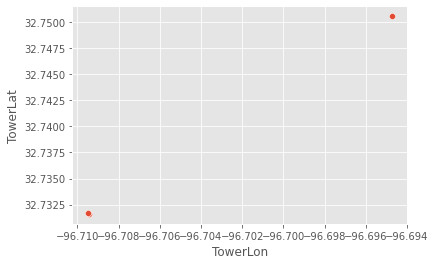

In [ ]:
#TO DO:
sns.scatterplot(data=user1_time_call_oow, x='TowerLon', y = 'TowerLat')

In [ ]:
user1_time_call_oow1 = user1[(user1['CallTime'] >= '22:00:00') | (user1['CallTime'] <= '06:00:00')]
user1_time_call_oow1

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
621,4638472273,5481755331,Incoming,2011-01-03,0 days 22:44:00.785678,Mon,0:03:10.663981,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
757,4638472273,7922223441,Missed,2011-01-05,0 days 22:14:05.925483,Wed,0:00:42.504919,1bfc786a-d4c2-464c-bc45-b9aad0c81216,32.731722,-96.709500
858,4638472273,6150928001,Incoming,2011-01-07,0 days 22:48:47.825163,Fri,0:01:00.671636,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
940,4638472273,6150928001,Incoming,2011-01-08,0 days 22:22:33.693878,Sat,0:00:35.065912,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
1591,4638472273,8068555700,Incoming,2011-01-18,0 days 22:47:42.990284,Tue,0:02:32.619365,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
...,...,...,...,...,...,...,...,...,...,...
51453,4638472273,7922223441,Incoming,2013-02-01,0 days 22:06:59.670813,Fri,0:02:22.333639,1bfc786a-d4c2-464c-bc45-b9aad0c81216,32.731722,-96.709500
51586,4638472273,2946222380,Incoming,2013-02-03,0 days 22:14:12.703233,Sun,0:04:05.550748,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
52268,4638472273,1755442610,Incoming,2013-02-13,0 days 05:35:38.188477,Wed,0:02:44.741836,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
52269,4638472273,7841019020,Incoming,2013-02-13,0 days 22:23:50.099716,Wed,0:03:24.082002,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417


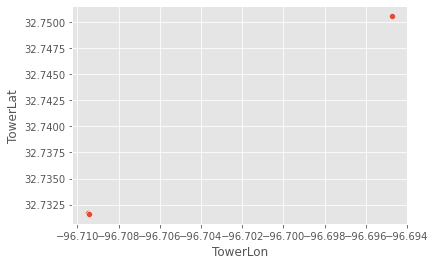

In [ ]:
sns.scatterplot(data=user1_time_call_oow1, x='TowerLon', y = 'TowerLat')

**8. Run K-Means on that dataframe with `K=2` then print out the Cluster Info using clusterInfo function**, with the goal being that one of the centroids will sweep up the annoying outliers; and the other will zero in on the user's approximate home location. Or rather the location of the cell tower closest to their home.....

Be sure to only feed in Lat and Lon coordinates to the KMeans algorithm since none of the other data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale, no feature scaling is required.

In [ ]:
#TO DO:
from sklearn.cluster import KMeans
useful_features = ['TowerLat', 'TowerLon']
x_train = user1_time_call_oow[useful_features].copy()
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train)
clusterInfo(kmeans)


Cluster Analysis Inertia:  1.1304346153788863e-07
------------------------------------------

  Cluster  0
    Centroid  [ 32.73164942 -96.70944573]
    #Samples  26

  Cluster  1
    Centroid  [ 32.750556 -96.694722]
    #Samples  2


**9. Add centroid locations onto your scatter plot. Use a distinguishable marker and color.**

Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


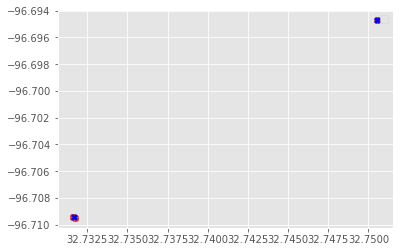

In [ ]:
#TO DO:
centroids = kmeans.cluster_centers_
centroids[:,1]
plt.scatter(user1_time_call_oow['TowerLat'] , user1_time_call_oow['TowerLon'])
plt.scatter(centroids[:,0] , centroids[:,1],  marker="X", color='b')
plt.legend()
plt.show()
 

**10. Now that you have a system in place, repeat the above steps (4, 8, and 9) for all 10 individuals in the dataset**. 

You might want to use a for-loop unless you enjoy copying and pasting:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  2.0222627342125383
------------------------------------------

  Cluster  0
    Centroid  [ 32.89725753 -96.90470092]
    #Samples  2021

  Cluster  1
    Centroid  [ 32.73670309 -96.71403501]
    #Samples  1627


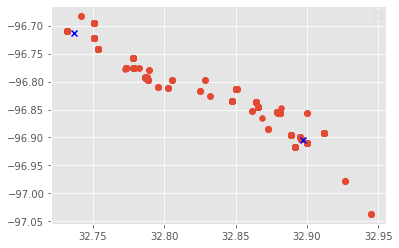

Cluster Analysis Inertia:  2.5360882555984037
------------------------------------------

  Cluster  0
    Centroid  [ 32.69997899 -96.93403247]
    #Samples  6664

  Cluster  1
    Centroid  [ 32.8697266  -96.92288527]
    #Samples  4969


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


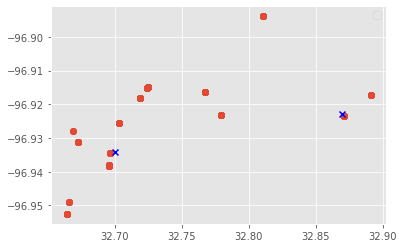

Cluster Analysis Inertia:  0.19885973913380603
------------------------------------------

  Cluster  0
    Centroid  [ 32.86357133 -96.86643342]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    #Samples  1286

  Cluster  1
    Centroid  [ 32.78195472 -96.89310902]
    #Samples  1610


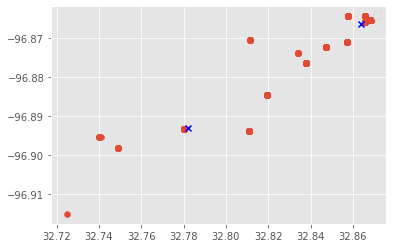

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.011290729481902184
------------------------------------------

  Cluster  0
    Centroid  [ 32.84671395 -96.83518329]
    #Samples  1134

  Cluster  1
    Centroid  [ 32.8541588  -96.84741331]
    #Samples  1363


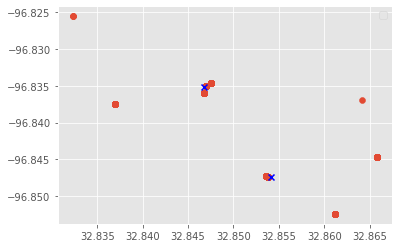

Cluster Analysis Inertia:  0.05286466998056458
------------------------------------------

  Cluster  0
    Centroid  [ 32.92125161 -96.75668579]
    #Samples  1660

  Cluster  1
    Centroid  [ 32.87499931 -96.73034439]
    #Samples  1205


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


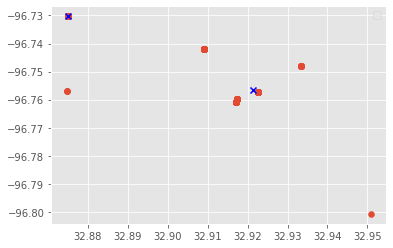

Cluster Analysis Inertia:  0.5977979311292801
------------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.




  Cluster  0
    Centroid  [ 32.77196035 -96.69242465]
    #Samples  699

  Cluster  1
    Centroid  [ 32.81102081 -96.86547112]
    #Samples  911


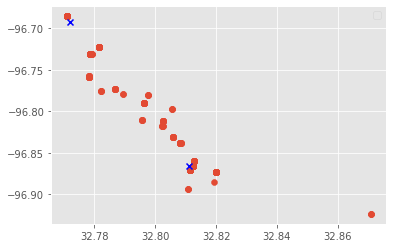

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.340892757975374
------------------------------------------

  Cluster  0
    Centroid  [ 32.75278632 -96.74349526]
    #Samples  1325

  Cluster  1
    Centroid  [ 32.70801142 -96.83462391]
    #Samples  1085


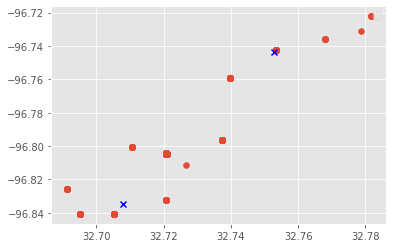

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  3.6204390158556095
------------------------------------------

  Cluster  0
    Centroid  [ 32.72028091 -96.82606713]
    #Samples  3220

  Cluster  1
    Centroid  [ 32.7045021  -96.61532634]
    #Samples  2615


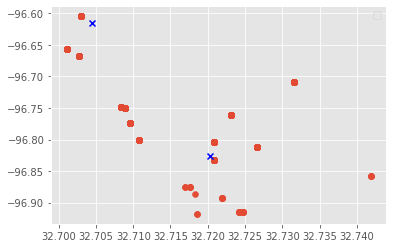

Cluster Analysis Inertia:  1.0197947022342408
------------------------------------------

  Cluster  0
    Centroid  [ 32.77336354 -96.81508844]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



    #Samples  5179

  Cluster  1
    Centroid  [ 32.72271798 -96.88984119]
    #Samples  6874


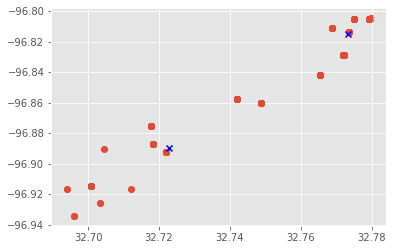

Cluster Analysis Inertia:  2.232109587602884
------------------------------------------

  Cluster  0
    Centroid  [ 32.98115835 -96.80278795]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    #Samples  4417

  Cluster  1
    Centroid  [ 32.77726672 -96.78080907]
    #Samples  3324


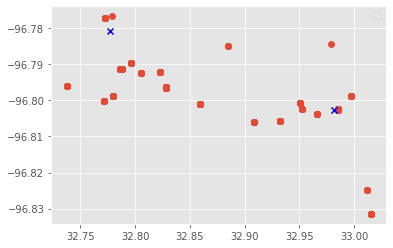

In [ ]:
models = []
#TO DO:
for i in range(10):    
    user = data[data['In'] == unique_phone_no[i]].copy()
    useful_features = ['TowerLat', 'TowerLon']
    x_train = user[useful_features].copy()
    kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train)
    clusterInfo(kmeans)
    models.append(kmeans)
    centroids = kmeans.cluster_centers_
    plt.scatter(user['TowerLat'] , user['TowerLon'])
    plt.scatter(centroids[:,0] , centroids[:,1],  marker="x", color='b')
    plt.legend()
    plt.show()


**11. Alter your slice from user1, so that it includes only Weekday (Mon-Fri) values and before 5pm:**

The idea is that the call was placed before 5pm. From Midnight-730a, the user is probably sleeping and won't call/wake up to take a call. There should be a brief time in the morning during their commute to work, then they'll spend the entire day at work. So the assumption is that most of the time is spent either at work or at the second, at home:
        

In [ ]:
#TO DO:
user1_weekdays_daytime = user1[(user1['DOW'] != 'Sat') & (user1['DOW'] != 'Sun')].copy() # != is different symbol
user1_weekdays_daytime = user1_weekdays_daytime[(user1_weekdays_daytime['CallTime'] <= '17:00:00') ]
user1_weekdays_daytime

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
197,4638472273,5481755331,Incoming,2010-12-28,0 days 16:20:11.532130,Tue,0:03:56.069765,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
200,4638472273,8180005891,Incoming,2010-12-28,0 days 15:27:51.105337,Tue,0:03:30.047757,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
248,4638472273,8180005891,Missed,2010-12-29,0 days 09:13:35.198987,Wed,0:02:10.574446,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
249,4638472273,2145623768,Incoming,2010-12-29,0 days 06:02:11.319738,Wed,0:04:34.436752,9baa92e7-e990-4e9e-8c0a-4c17cb4ecc7c,32.731611,-96.709417
250,4638472273,8068555700,Incoming,2010-12-29,0 days 13:54:14.724722,Wed,0:03:31.297111,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
...,...,...,...,...,...,...,...,...,...,...
53091,4638472273,6150928001,Missed,2013-02-25,0 days 16:55:01.129212,Mon,0:02:48.163010,0296279d-18c3-4709-853e-3e20496ce444,32.899944,-96.910389
53138,4638472273,8068555700,Incoming,2013-02-26,0 days 07:28:38.486982,Tue,0:03:51.307727,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
53140,4638472273,2666307251,Missed,2013-02-26,0 days 11:26:01.888502,Tue,0:03:08.177065,0296279d-18c3-4709-853e-3e20496ce444,32.899944,-96.910389
53143,4638472273,7721472178,Incoming,2013-02-26,0 days 07:50:41.435642,Tue,0:04:04.460385,e78826ad-45b0-45d4-90ec-4776d73f1d8e,32.864167,-96.836944


In [ ]:
user1_weekdays_daytime.shape

(1405, 10)

**12. Plot the Cell Towers the above data frame:**


<AxesSubplot:xlabel='TowerLon', ylabel='TowerLat'>

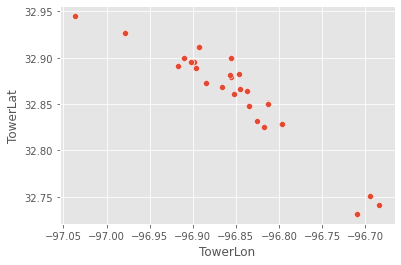

In [ ]:
#TO DO:
sns.scatterplot(data=user1_weekdays_daytime, x='TowerLon', y = 'TowerLat')

**13. Complete the doKmeans function:**

In [ ]:
#TO DO:
def doKMeans(data, num_clusters=0):
    # TODO: Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
    # data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
    # no feature scaling is required. Print out the centroid locations and add them onto your scatter
    # plot. Use a distinguishable marker and color.
    #
    # Hint: Make sure you fit ONLY the coordinates, and in the CORRECT order (lat first). This is part
    # of your domain expertise. Also, *YOU* need to create, initialize (and return) the variable named
    # `model` here, which will be a SKLearn K-Means model for this to work:
    
    # .. your code here ..
    useful_features = ['TowerLat', 'TowerLon']
    x_train = data[useful_features].copy()
    model = KMeans(n_clusters=num_clusters, random_state=0).fit(x_train)
    return model

**14. Let's tun K-Means with `K=3`using doKMeans function for that dataframe (user1 on weekdays in daytime). Then print out the cluster info using clusterInfo function:**

There should only be two areas of concentration. If you notice multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR apart from one another).

In [ ]:
#TO DO:
model = doKMeans(user1_weekdays_daytime, 3)
clusterInfo(model)

Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


**15. Print out the mean `CallTime` value for the samples belonging to the cluster with the LEAST samples attached to it.** 

If our logic is correct, the cluster with the MOST samples will be work. The cluster with the 2nd most samples will be home. And the `K=3` cluster with the least samples should be somewhere in between the two. What time, on average, is the user in between home and work, between midnight and 5pm?

In [ ]:
#TO DO:
user1_weekdays_daytime['CallTime'] = pd.to_datetime(user1_weekdays_daytime['CallTime'])
minsamples = clusterWithFewestSamples(model).loc[minsamples, 'CallTime'].mean()

In [ ]:
labels = model.labels_
user1_weekdays_daytime["Clus_km"] = labels
user1_weekdays_daytime

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon,Clus_km
197,4638472273,5481755331,Incoming,2010-12-28,0 days 16:20:11.532130,Tue,0:03:56.069765,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389,0
200,4638472273,8180005891,Incoming,2010-12-28,0 days 15:27:51.105337,Tue,0:03:30.047757,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389,0
248,4638472273,8180005891,Missed,2010-12-29,0 days 09:13:35.198987,Wed,0:02:10.574446,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389,0
249,4638472273,2145623768,Incoming,2010-12-29,0 days 06:02:11.319738,Wed,0:04:34.436752,9baa92e7-e990-4e9e-8c0a-4c17cb4ecc7c,32.731611,-96.709417,1
250,4638472273,8068555700,Incoming,2010-12-29,0 days 13:54:14.724722,Wed,0:03:31.297111,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389,0
...,...,...,...,...,...,...,...,...,...,...,...
53091,4638472273,6150928001,Missed,2013-02-25,0 days 16:55:01.129212,Mon,0:02:48.163010,0296279d-18c3-4709-853e-3e20496ce444,32.899944,-96.910389,0
53138,4638472273,8068555700,Incoming,2013-02-26,0 days 07:28:38.486982,Tue,0:03:51.307727,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500,1
53140,4638472273,2666307251,Missed,2013-02-26,0 days 11:26:01.888502,Tue,0:03:08.177065,0296279d-18c3-4709-853e-3e20496ce444,32.899944,-96.910389,0
53143,4638472273,7721472178,Incoming,2013-02-26,0 days 07:50:41.435642,Tue,0:04:04.460385,e78826ad-45b0-45d4-90ec-4776d73f1d8e,32.864167,-96.836944,2


In [ ]:
clusterWithFewestSamples(model)


  Cluster With Fewest Samples:  2


array([False, False, False, ..., False,  True,  True])

In [ ]:
user1_weekdays_daytime_FewestSamples = user1_weekdays_daytime[(user1_weekdays_daytime['Clus_km'] == 2)].copy()
user1_weekdays_daytime_FewestSamples

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon,Clus_km
687,4638472273,7428841195,Incoming,2011-01-04,0 days 07:58:32.520458,Tue,0:00:07.898801,255916de-6cc8-4e23-9788-5cbc1fc76232,32.850833,-96.812500,2
1096,4638472273,8180005891,Incoming,2011-01-10,0 days 07:47:24.372195,Mon,0:04:50.221544,a9fff0cf-b6ca-4f94-ad74-c9da6d9f394e,32.847528,-96.834583,2
1172,4638472273,7922223441,Incoming,2011-01-11,0 days 07:40:49.055404,Tue,0:04:09.214850,abf4411c-3a5b-4c8d-929f-e0fa3a4a4c48,32.850000,-96.812500,2
1362,4638472273,4217121115,Incoming,2011-01-14,0 days 07:55:23.333518,Fri,0:02:10.838382,a9fff0cf-b6ca-4f94-ad74-c9da6d9f394e,32.847528,-96.834583,2
1588,4638472273,1755442610,Missed,2011-01-18,0 days 07:55:20.281080,Tue,0:03:09.666667,3a7fc5bf-01db-46cd-9658-0ec37598d3a8,32.825278,-96.817778,2
...,...,...,...,...,...,...,...,...,...,...,...
52272,4638472273,5455269258,Incoming,2013-02-13,0 days 07:37:56.201487,Wed,0:02:46.267715,831f2efc-a648-4c5d-8602-d30a2d184b11,32.825278,-96.817778,2
52433,4638472273,4217121115,Incoming,2013-02-15,0 days 07:39:50.636877,Fri,0:03:55.769800,87ceaad8-f8e1-44a1-8ff8-fa469e258677,32.864167,-96.836944,2
52660,4638472273,2946222380,Incoming,2013-02-18,0 days 07:46:58.730624,Mon,0:05:06.728362,abf4411c-3a5b-4c8d-929f-e0fa3a4a4c48,32.850000,-96.812500,2
53143,4638472273,7721472178,Incoming,2013-02-26,0 days 07:50:41.435642,Tue,0:04:04.460385,e78826ad-45b0-45d4-90ec-4776d73f1d8e,32.864167,-96.836944,2


In [ ]:
user1_weekdays_daytime_FewestSamples['CallTime'].mean()

Timedelta('0 days 07:49:53.168115942')

**16. Let's visualize the results by drawing the X's for the cluster centers combined with location plot:**


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


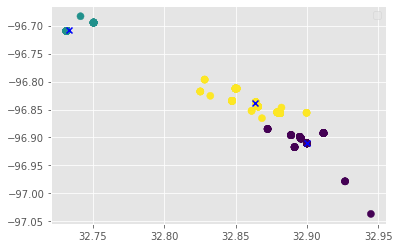

In [ ]:
#TO DO:
centers = model.cluster_centers_
plt.scatter(user1_weekdays_daytime['TowerLat'] , user1_weekdays_daytime['TowerLon'], c=model.labels_, s=50, cmap='viridis')
plt.scatter(centers[:,0] , centers[:,1],  marker="x", color='b')
plt.legend()
plt.show()

# Adanved part (15%  of the total score)

**17. Now that you have a system in place, repeat the the steps 12, 14 and 16 for all 10 individuals in the dataset.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


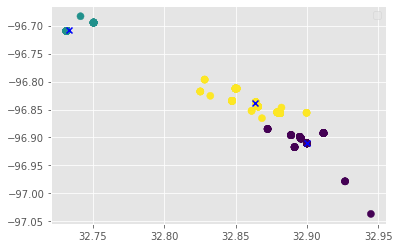

Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


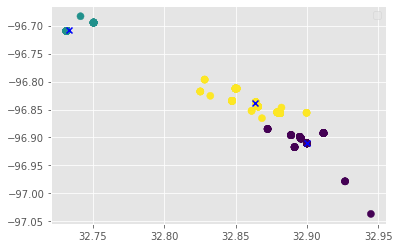

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


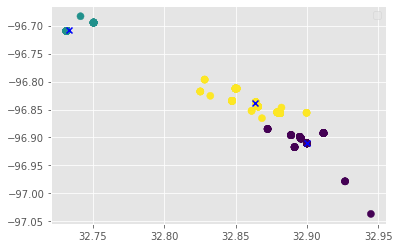

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


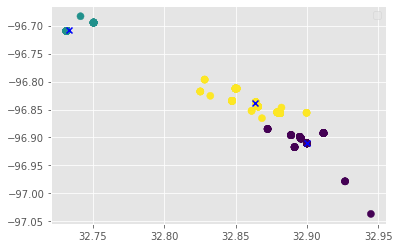

Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


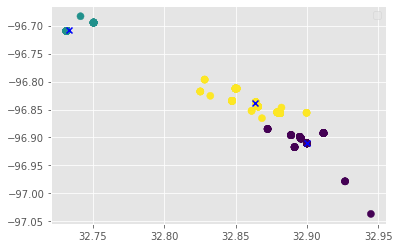

Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


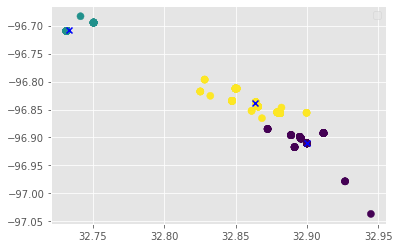

Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


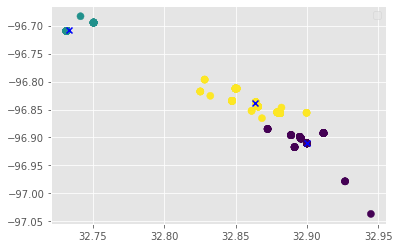

Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


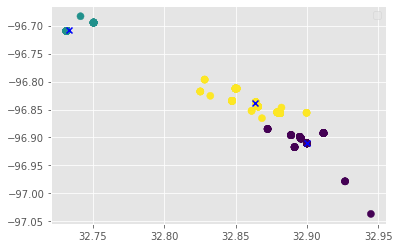

Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


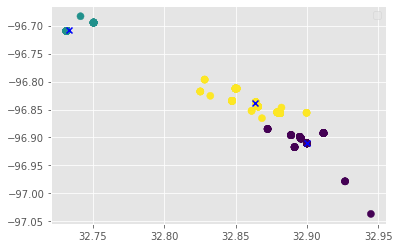

Cluster Analysis Inertia:  0.15891069523781096
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


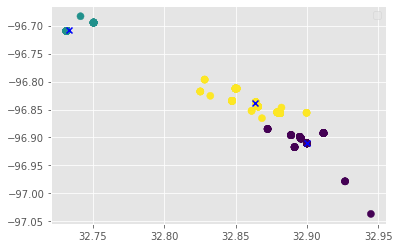

In [ ]:
#TO DO:
for i in range(10):    
    user = data[data['In'] == unique_phone_no[i]].copy()    
    useful_features = ['TowerLat', 'TowerLon']

    user1_weekdays_daytime = user1[(user1['DOW'] != 'Sat') & (user1['DOW'] != 'Sun')].copy()
    user1_weekdays_daytime = user1_weekdays_daytime[(user1_weekdays_daytime['CallTime'] <= '17:00:00')]

    model = doKMeans(user1_weekdays_daytime, 3)
    clusterInfo(model) 
    centers = model.cluster_centers_
    plt.scatter(user1_weekdays_daytime['TowerLat'] , user1_weekdays_daytime['TowerLon'], c=model.labels_, s=50, cmap='viridis')
    plt.scatter(centers[:,0] , centers[:,1],  marker="x", color='b')
    plt.legend()
    plt.show()